# 2.2 SOO for 1D scalars

In [5]:
%matplotlib inline
import sys
import os

# Sort the paths out to run from this file
parent_path = os.path.dirname(os.getcwd())
src_path = os.path.join(os.path.sep,parent_path, 'src')
sys.path.append(src_path)
print(src_path)

c:\Users\Domfx\OneDrive\Code\cyclops\src


description

In [6]:
from run_me import *


# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = GraphManager()
true_temp_field = pickle_manager.read_file('simulation', 'temp_line_field.obj')
grid = pickle_manager.read_file('simulation', 'temp_line_points.obj')

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds+np.array([[1], [-1]])*0.002

description

In [7]:
# Setup the symmetry
symmetry_manager = SymmetryManager()
symmetry_manager.set_1D_x(0.01)

# Setup the sensor suite
temps = pickle_manager.read_file('sensors', 'k-type-T.obj')
voltages = pickle_manager.read_file('sensors', 'k-type-V.obj')
sensor = Thermocouple(temps, voltages, 1)
sensors = np.array([sensor]*5)


# def f(x): return np.zeros(x.shape)
# sensor = MultiSensor(0, f, 0.1, np.array([[-5000], [5000]]), np.linspace(sensor_bounds[0, 0], sensor_bounds[1, 0], 10).reshape(-1, 1))
# sensors = np.array([sensor])

sensor_suite = SensorSuite(
    ScalarField(CSModel, field_bounds), 
    sensors
)

description

In [8]:
# Setup the experiment
optimiser = PSOOptimiser('00:00:10')
experiment = Experiment(
    true_temp_field,
    grid,
    optimiser
)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds
)
res = experiment.design()
proposed_layout, true_temps, model_temps, sensor_values = experiment.get_SOO_plotting_arrays(res.X)

Exception: Output data should be a numpy array of shape (-1, 1).

description

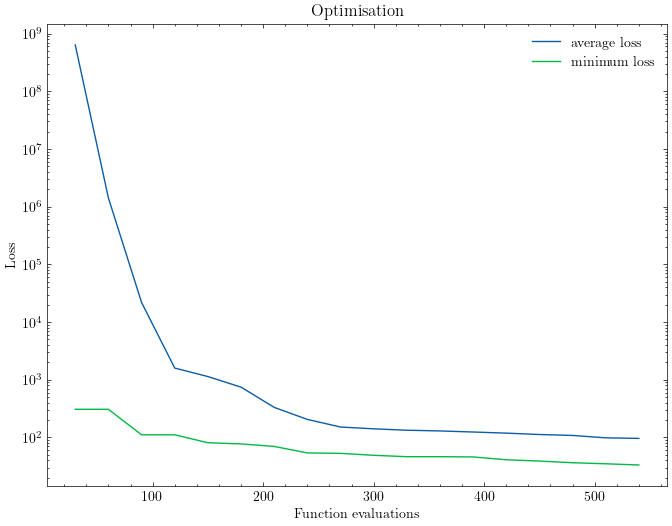

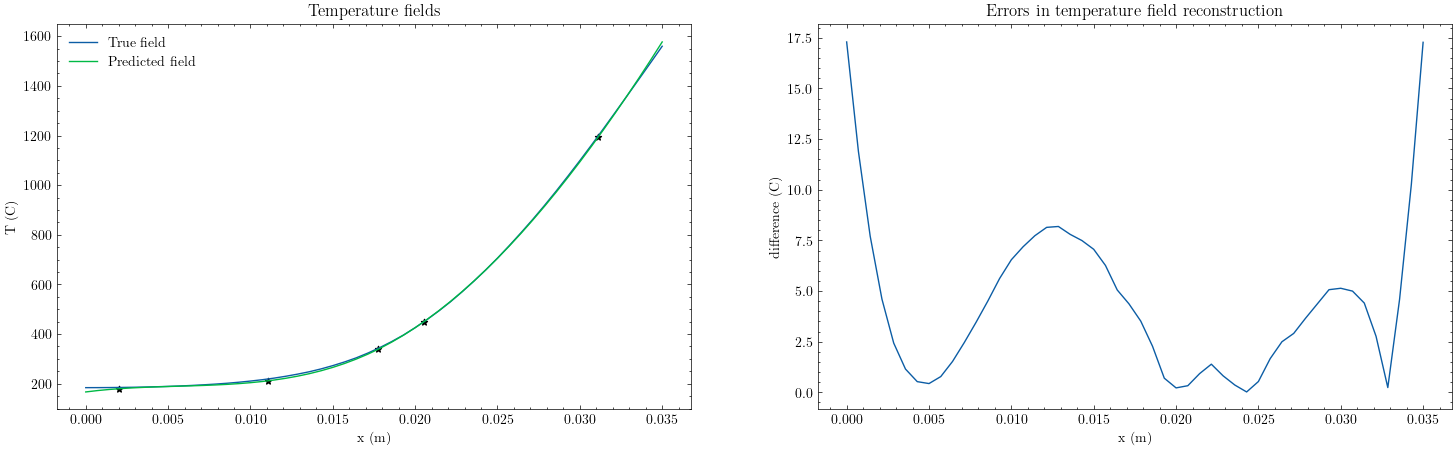

In [ ]:
# Display the results
graph_manager.build_optimisation(
    res.history
)
graph_manager.draw()
graph_manager.build_1D_compare(
    grid,
    proposed_layout,
    sensor_values,
    true_temps,
    model_temps
)
graph_manager.draw()